# Data Exploration

In [249]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib import style
style.use("ggplot")
%matplotlib inline

Loading training set

In [279]:
trainpd = pd.read_csv("train.csv")
testpd = pd.read_csv("test.csv")
myprediction = testpd[["PassengerId"]]

In [280]:
myprediction.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [281]:
trainpd.drop(["Ticket", "Cabin"], axis=1, inplace=True)

In [282]:
trainpd.set_index(["PassengerId"], inplace=True)
testpd.set_index(["PassengerId"], inplace=True)


In [283]:
trainpd.drop(["Ticket", "Cabin"], axis=1, inplace=True)
testpd.drop(["Ticket", "Cabin"], axis=1, inplace=True)

ValueError: labels ['Ticket' 'Cabin'] not contained in axis

In [284]:
trainpd.columns
testpd.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

Creating numerical values for string valued columns

In [285]:
trainpd["SexN"] = 1
trainpd.loc[trainpd["Sex"]=='male', ("SexN")] = 0

trainpd["EmbarkedN"] = 0 # C = 0
trainpd.loc[trainpd["Embarked"]=='S', ("EmbarkedN")] = 1 # S = 1
trainpd.loc[trainpd["Embarked"]=='Q', ("EmbarkedN")] = 2 # Q = 2

testpd["SexN"] = 1
testpd.loc[testpd["Sex"]=='male', ("SexN")] = 0

testpd["EmbarkedN"] = 0 # C = 0
testpd.loc[testpd["Embarked"]=='S', ("EmbarkedN")] = 1 # S = 1
testpd.loc[testpd["Embarked"]=='Q', ("EmbarkedN")] = 2 # Q = 2

Discritize

In [286]:
trainpd.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,SexN,EmbarkedN
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.895623
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.516354
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


In [287]:
trainpd.Age.fillna(trainpd.Age.median(), inplace=True)
trainpd.Fare.fillna(trainpd.Fare.median(), inplace=True)

testpd.Age.fillna(testpd.Age.median(), inplace=True)
testpd.Fare.fillna(testpd.Fare.median(), inplace=True)

In [288]:
trainpd["FareD"] = 0
trainpd.loc[trainpd["Fare"]>10, ("FareD")] = 1
trainpd.loc[trainpd["Fare"]>50, ("FareD")] = 2

testpd["FareD"] = 0
testpd.loc[testpd["Fare"]>10, ("FareD")] = 1
testpd.loc[testpd["Fare"]>50, ("FareD")] = 2

trainpd.loc[trainpd["SibSp"]>0, ("SibSp")] = 1
trainpd.loc[trainpd["Parch"]>0, ("Parch")] = 1

In [289]:
trainpd.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,SexN,EmbarkedN,FareD
Survived,1.000000,-0.338481,-0.064910,0.115867,0.147408,0.257307,0.543351,-0.131042,0.351409
Pclass,-0.338481,1.000000,-0.339898,-0.076009,-0.027526,-0.549500,-0.131900,0.311549,-0.725591
Age,-0.064910,-0.339898,1.000000,-0.143102,-0.253561,0.096688,-0.081163,-0.046930,0.140215
SibSp,0.115867,-0.076009,-0.143102,1.000000,0.420233,0.192190,0.203203,-0.053541,0.418504
Parch,0.147408,-0.027526,-0.253561,0.420233,1.000000,0.237717,0.247523,-0.075302,0.336752
Fare,0.257307,-0.549500,0.096688,0.192190,0.237717,1.000000,0.182333,-0.272150,0.642974
SexN,0.543351,-0.131900,-0.081163,0.203203,0.247523,0.182333,1.000000,-0.028342,0.277632
EmbarkedN,-0.131042,0.311549,-0.046930,-0.053541,-0.075302,-0.272150,-0.028342,1.000000,-0.291300
FareD,0.351409,-0.725591,0.140215,0.418504,0.336752,0.642974,0.277632,-0.291300,1.000000


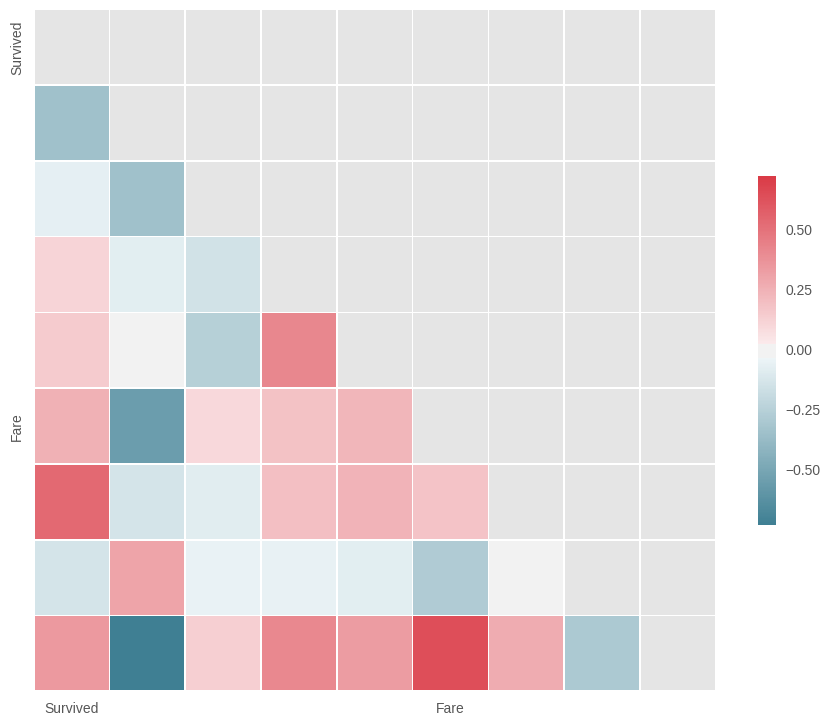

In [290]:
# Compute the correlation matrix
corr = trainpd.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Machine learning part

Create features and labels

In [311]:
#features = ["Pclass" ,"AgeD", "SibSp", "Parch", "FareD", "SexN", "EmbarkedN"]
features = ["Pclass","FareD", "SexN","SibSp", "Parch"]

trainf = trainpd[features].values
trainl = trainpd["Survived"].values
testf = testpd[features].values

In [312]:
print(np.shape(trainf), np.shape(trainl), np.shape(testf))

(891, 5) (891,) (418, 5)


Import classifier

In [313]:
from sklearn import tree, model_selection, svm, neural_network, ensemble

In [333]:
#hl = (100,100,100,50)
#clfNN = neural_network.MLPClassifier(random_state=42, hidden_layer_sizes=hl)

clfTree = tree.DecisionTreeClassifier(max_depth=2,random_state=42)
clfRF = ensemble.RandomForestClassifier(n_estimators=20, max_leaf_nodes=50, max_depth=5, min_impurity_split=1e-9, random_state=42)

In [334]:
print(np.mean(model_selection.cross_val_score(clfTree, trainf, trainl, cv=5)),
np.mean(model_selection.cross_val_score(clfRF, trainf, trainl, cv=5)))

0.7733072037 0.796909411952


In [336]:
clfTree.fit(trainf,trainl)
clfRF.fit(trainf, trainl)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=50,
            min_impurity_split=1e-09, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [337]:
myprediction["Survived"] = clfRF.predict(testf)

/home/ertugrul/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [338]:
myprediction.Survived.value_counts(normalize=True)

0    0.677033
1    0.322967
Name: Survived, dtype: float64

In [339]:
myprediction.to_csv("KaggleTitanicSolution.csv",index=False)